## Imports

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys
project_root = os.path.abspath(os.path.join('..'))
if project_root not in sys.path:
    sys.path.append(project_root)

import warnings
warnings.simplefilter("ignore", UserWarning)

In [10]:
# from transformers import SegformerForSemanticSegmentation
import torch
import seaborn as sns
import pandas as pd
from torch import nn
import numpy as np
from torchinfo import summary
from helper.models.unet import *
from helper.models.deeplab_mobilenet import *
from helper.models.nvidia_ade20k import *
from engine.application import *
import matplotlib.pyplot as plt
%matplotlib inline

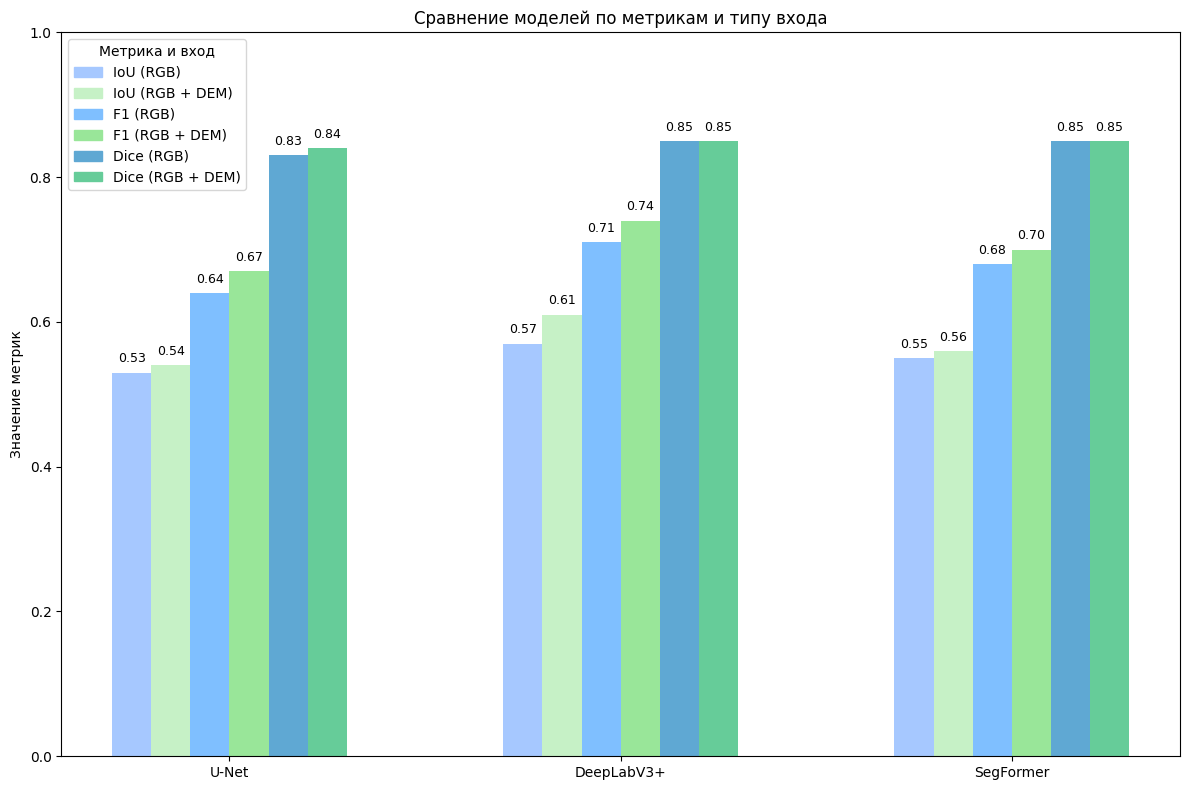

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

data = [
    ['U-Net', 'IoU', 'RGB', 0.53, '#a6c8ff'],
    ['U-Net', 'IoU', 'RGB + DEM', 0.54, '#c6f1c6'],
    ['U-Net', 'F1', 'RGB', 0.64, '#7fbfff'],
    ['U-Net', 'F1', 'RGB + DEM', 0.67, '#99e699'],
    ['U-Net', 'Dice', 'RGB', 0.83, '#5fa8d3'],
    ['U-Net', 'Dice', 'RGB + DEM', 0.84, '#66cc99'],

    ['DeepLabV3+', 'IoU', 'RGB', 0.57, '#a6c8ff'],
    ['DeepLabV3+', 'IoU', 'RGB + DEM', 0.61, '#c6f1c6'],
    ['DeepLabV3+', 'F1', 'RGB', 0.71, '#7fbfff'],
    ['DeepLabV3+', 'F1', 'RGB + DEM', 0.74, '#99e699'],
    ['DeepLabV3+', 'Dice', 'RGB', 0.85, '#5fa8d3'],
    ['DeepLabV3+', 'Dice', 'RGB + DEM', 0.85, '#66cc99'],

    ['SegFormer', 'IoU', 'RGB', 0.55, '#a6c8ff'],
    ['SegFormer', 'IoU', 'RGB + DEM', 0.56, '#c6f1c6'],
    ['SegFormer', 'F1', 'RGB', 0.68, '#7fbfff'],
    ['SegFormer', 'F1', 'RGB + DEM', 0.70, '#99e699'],
    ['SegFormer', 'Dice', 'RGB', 0.85, '#5fa8d3'],
    ['SegFormer', 'Dice', 'RGB + DEM', 0.85, '#66cc99'],
]

df = pd.DataFrame(data, columns=['Model', 'Metric', 'Input', 'Value', 'Color'])

models = ['U-Net', 'DeepLabV3+', 'SegFormer']
bar_width = 0.1
group_spacing = 0.4

positions = []
xticks = []
xticklabels = []
x = 0

for model in models:
    model_df = df[df['Model'] == model]
    for _, row in model_df.iterrows():
        positions.append(x)
        x += bar_width
    xticks.append((positions[-6] + positions[-1]) / 2)  # центр группы
    xticklabels.append(model)
    x += group_spacing  

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(positions, df['Value'], color=df['Color'], width=bar_width)

for bar, value in zip(bars, df['Value']):
    ax.text(bar.get_x() + bar.get_width()/2, value + 0.01, f"{value:.2f}",
            ha='center', va='bottom', fontsize=9)

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_ylabel("Значение метрик")
ax.set_ylim(0, 1)
ax.set_title("Сравнение моделей по метрикам и типу входа")

legend_elements = [
    Patch(color='#a6c8ff', label='IoU (RGB)'),
    Patch(color='#c6f1c6', label='IoU (RGB + DEM)'),
    Patch(color='#7fbfff', label='F1 (RGB)'),
    Patch(color='#99e699', label='F1 (RGB + DEM)'),
    Patch(color='#5fa8d3', label='Dice (RGB)'),
    Patch(color='#66cc99', label='Dice (RGB + DEM)'),
]
ax.legend(handles=legend_elements, title="Метрика и вход")

plt.tight_layout()
plt.show()
